In [1]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 1.6em;
line-height:1.4em
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-right:3em;
}
</style>
""")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline
from itertools import cycle, islice
import pylab as pl
import operator
import re
from collections import OrderedDict
import pickle
import matplotlib.colors as colors
import math
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
#seaborn settings
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

#set pandas so i can view all dataframne columns
pd.set_option('display.max_columns', None)

#import csv file
PTCAudit = pd.read_csv('PTCAuditmodel.csv',low_memory=False)
PTCAudit.head()

,Unnamed: 0,AGIFinal2,AUDIT_RESULT2,Agi_Comp,Annl_SLCSP_Prem_Comp,Annual_Contrib_Health_Care_Amt,Aptc_Amt_Comp,Aptc_Amt_From_1040,Bal_Due_Amt_Comp,Bal_Due_Amt_CompFinal2,Bod_Cd2,Current_Ty_Exemptions,Cycle_Scored,DISP_CD,Ddb_Ptc_900_Cdb,Ddb_Ptc_901_Cdb,Ddb_Ptc_902_Cdb,Ddb_Ptc_903_Cdb,Ddb_Ptc_904_Cdb,Ddb_Ptc_910_Cdb,Ddb_Ptc_911_Cdb,Ddb_Ptc_912_Cdb,Ddb_Ptc_913_Cdb,Ddb_Ptc_914_Cdb,Dependent_Ind,Exc_Aptc_Amt,Exc_Aptc_Lim_Amt,Exposure_AmtFinal2,Family_Size,Filing_Status,First_Time_Filer,Fpl_Pct_CompFinal2,Hardship_Ind,Household_Income_Amt,PTC_Scored_Count,Prior_Ty_Exemptions,Prior_Ty_Filing_Status,Ptc_Amt_Comp,Ptc_Amt_To_Agi_Pct_Comp,Ptc_Err_190_Cdb,Ptc_Err_191_Cdb,Ptc_Err_193_Cdb,Ptc_Err_194_Cdb,Ptc_Err_195_Cdb,Ptc_Err_196_Cdb,Ptc_Err_197_Cdb,Ptc_Err_198_Cdb,Ptc_Err_199_Cdb,Ptc_Err_344_Cdb,Ptc_Ind,Ptc_Magi_Amt,Recon_Ptc_Amt,Recon_Ptc_Amt_Sum,Sch_C_Prof_Loss_AmtFinal2,Sch_C_To_Agi_Pct_Comp,Scnd_Taxpayer_Age,Taxpayer_Age,Tot_Income,Unnamed: 0.1,tin
0,0,7.0,1.0,63447,5805,0,0,0,-3389,1.0,2.0,2,201514,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,62,65,63447,0,2077793
1,1,5.0,1.0,31143,5700,2697,0,0,-3592,1.0,2.0,1,201517,4,0,0,0,0,0,0,0,0,0,0,0.0,0,0,11.0,1,1,0.0,3.0,0,31143,1,1,1.0,3003,9.64,0,0,0,0,0,0,0,0,1,0,1,31143,3003,3003,6.0,0.0,0,59,31143,1,2136992
2,2,8.0,1.0,99074,8940,0,0,0,35057,9.0,1.0,1,201535,4,0,0,0,0,0,0,0,1,0,0,1.0,0,0,10.0,0,3,0.0,5.0,0,0,1,2,3.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,0,53,108085,2,2143790
3,3,7.0,1.0,58231,12852,0,0,0,3671,9.0,2.0,2,201528,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,4.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,58,63,58231,3,2205691
4,4,7.0,1.0,62656,11610,0,0,0,-366,4.0,2.0,2,201524,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,10.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,48,51,62656,4,2349124


In [4]:
PTCAudit = PTCAudit[PTCAudit.columns.difference(['Disp_Cd', 'DISP_CD'])]
PTCAudit.head()

,AGIFinal2,AUDIT_RESULT2,Agi_Comp,Annl_SLCSP_Prem_Comp,Annual_Contrib_Health_Care_Amt,Aptc_Amt_Comp,Aptc_Amt_From_1040,Bal_Due_Amt_Comp,Bal_Due_Amt_CompFinal2,Bod_Cd2,Current_Ty_Exemptions,Cycle_Scored,Ddb_Ptc_900_Cdb,Ddb_Ptc_901_Cdb,Ddb_Ptc_902_Cdb,Ddb_Ptc_903_Cdb,Ddb_Ptc_904_Cdb,Ddb_Ptc_910_Cdb,Ddb_Ptc_911_Cdb,Ddb_Ptc_912_Cdb,Ddb_Ptc_913_Cdb,Ddb_Ptc_914_Cdb,Dependent_Ind,Exc_Aptc_Amt,Exc_Aptc_Lim_Amt,Exposure_AmtFinal2,Family_Size,Filing_Status,First_Time_Filer,Fpl_Pct_CompFinal2,Hardship_Ind,Household_Income_Amt,PTC_Scored_Count,Prior_Ty_Exemptions,Prior_Ty_Filing_Status,Ptc_Amt_Comp,Ptc_Amt_To_Agi_Pct_Comp,Ptc_Err_190_Cdb,Ptc_Err_191_Cdb,Ptc_Err_193_Cdb,Ptc_Err_194_Cdb,Ptc_Err_195_Cdb,Ptc_Err_196_Cdb,Ptc_Err_197_Cdb,Ptc_Err_198_Cdb,Ptc_Err_199_Cdb,Ptc_Err_344_Cdb,Ptc_Ind,Ptc_Magi_Amt,Recon_Ptc_Amt,Recon_Ptc_Amt_Sum,Sch_C_Prof_Loss_AmtFinal2,Sch_C_To_Agi_Pct_Comp,Scnd_Taxpayer_Age,Taxpayer_Age,Tot_Income,Unnamed: 0,Unnamed: 0.1,tin
0,7.0,1.0,63447,5805,0,0,0,-3389,1.0,2.0,2,201514,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,62,65,63447,0,0,2077793
1,5.0,1.0,31143,5700,2697,0,0,-3592,1.0,2.0,1,201517,0,0,0,0,0,0,0,0,0,0,0.0,0,0,11.0,1,1,0.0,3.0,0,31143,1,1,1.0,3003,9.64,0,0,0,0,0,0,0,0,1,0,1,31143,3003,3003,6.0,0.0,0,59,31143,1,1,2136992
2,8.0,1.0,99074,8940,0,0,0,35057,9.0,1.0,1,201535,0,0,0,0,0,0,0,1,0,0,1.0,0,0,10.0,0,3,0.0,5.0,0,0,1,2,3.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,0,53,108085,2,2,2143790
3,7.0,1.0,58231,12852,0,0,0,3671,9.0,2.0,2,201528,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,4.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,58,63,58231,3,3,2205691
4,7.0,1.0,62656,11610,0,0,0,-366,4.0,2.0,2,201524,0,0,0,0,0,0,0,1,0,0,0.0,0,0,10.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,48,51,62656,4,4,2349124


In [5]:
pd.set_option('display.max_rows', 100)
PTCAudit.dtypes

AGIFinal2                         float64
AUDIT_RESULT2                     float64
Agi_Comp                            int64
Annl_SLCSP_Prem_Comp                int64
Annual_Contrib_Health_Care_Amt      int64
Aptc_Amt_Comp                       int64
Aptc_Amt_From_1040                  int64
Bal_Due_Amt_Comp                    int64
Bal_Due_Amt_CompFinal2            float64
Bod_Cd2                           float64
Current_Ty_Exemptions               int64
Cycle_Scored                        int64
Ddb_Ptc_900_Cdb                     int64
Ddb_Ptc_901_Cdb                     int64
Ddb_Ptc_902_Cdb                     int64
Ddb_Ptc_903_Cdb                     int64
Ddb_Ptc_904_Cdb                     int64
Ddb_Ptc_910_Cdb                     int64
Ddb_Ptc_911_Cdb                     int64
Ddb_Ptc_912_Cdb                     int64
Ddb_Ptc_913_Cdb                     int64
Ddb_Ptc_914_Cdb                     int64
Dependent_Ind                     float64
Exc_Aptc_Amt                      

In [44]:
f=PTCAudit 
f = pd.Series(f.AUDIT_RESULT2).value_counts().reset_index().sort_values('index').reset_index(drop=True)
f.columns = ['AUDIT_RESULT2', 'Frequency']
print (f)

   AUDIT_RESULT2  Frequency
0            0.0       2475
1            1.0       5963


As the class vaiable AUDIT_RESULT2 is imbalanced, I will use oversampling to balance the class variable before proceeding with modeling. 

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
from sklearn.model_selection import train_test_split
training_features, test_features, \
training_target, test_target, = train_test_split(PTCAudit.drop(['AUDIT_RESULT2'], axis=1),
                                               PTCAudit['AUDIT_RESULT2'],
                                               test_size = .1,
                                               random_state=12)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .1,
                                                  random_state=12)

In [46]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

NameError: name 'SMOTE' is not defined

In [ ]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

Next, I will use PCA to extract only relevant features in the dataset.

In [6]:
# Feature Extraction with PCA
import numpy
from sklearn.decomposition import PCA
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = PTCAudit
array = dataframe.values
X = array[:,4:60]
Y = array[:,3]
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
#print("Explained Variance: %s") % fit.explained_variance_ratio_
#print(fit.components_)
pca.fit(X)
PTCAudit_New=pca.transform(PTCAudit)

ValueError: operands could not be broadcast together with shapes (8438,59) (55,) 

Lets first look at a base model before feature extraction.

In [8]:
X, y = PTCAudit.values, PTCAudit.AUDIT_RESULT2

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('Accuracy score of training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy score of training set: 0.703
Accuracy score of test set: 0.719


Baseline performance of the model is 69.7%. 

In [11]:
#linear SVC for feature extraction
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
X, y = PTCAudit.values, PTCAudit.AUDIT_RESULT2
X.shape

(8438, 59)

In [12]:
lsvc = LinearSVC(C=0.01, penalty="l1", 
                 dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(8438, 5)

Feature selection picked 9 variables as the most important. We will use those going forward.

Once I've extracted only the important features, I run the logistic regression. I used L1 regularization to help eliminate features that have very little impact on the churn variable.

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [23]:
PTCAudit.head()

,AGIFinal2,AUDIT_RESULT2,Agi_Comp,Annl_SLCSP_Prem_Comp,Annual_Contrib_Health_Care_Amt,Aptc_Amt_Comp,Aptc_Amt_From_1040,Bal_Due_Amt_Comp,Bal_Due_Amt_CompFinal2,Bod_Cd2,Current_Ty_Exemptions,Cycle_Scored,DISP_CD,Ddb_Ptc_900_Cdb,Ddb_Ptc_901_Cdb,Ddb_Ptc_902_Cdb,Ddb_Ptc_903_Cdb,Ddb_Ptc_904_Cdb,Ddb_Ptc_910_Cdb,Ddb_Ptc_911_Cdb,Ddb_Ptc_912_Cdb,Ddb_Ptc_913_Cdb,Ddb_Ptc_914_Cdb,Dependent_Ind,Exc_Aptc_Amt,Exc_Aptc_Lim_Amt,Exposure_AmtFinal2,Family_Size,Filing_Status,First_Time_Filer,Fpl_Pct_CompFinal2,Hardship_Ind,Household_Income_Amt,PTC_Scored_Count,Prior_Ty_Exemptions,Prior_Ty_Filing_Status,Ptc_Amt_Comp,Ptc_Amt_To_Agi_Pct_Comp,Ptc_Err_190_Cdb,Ptc_Err_191_Cdb,Ptc_Err_193_Cdb,Ptc_Err_194_Cdb,Ptc_Err_195_Cdb,Ptc_Err_196_Cdb,Ptc_Err_197_Cdb,Ptc_Err_198_Cdb,Ptc_Err_199_Cdb,Ptc_Err_344_Cdb,Ptc_Ind,Ptc_Magi_Amt,Recon_Ptc_Amt,Recon_Ptc_Amt_Sum,Sch_C_Prof_Loss_AmtFinal2,Sch_C_To_Agi_Pct_Comp,Scnd_Taxpayer_Age,Taxpayer_Age,Tot_Income,Unnamed: 0,Unnamed: 0.1,tin
0,7.0,1.0,63447,5805,0,0,0,-3389,1.0,2.0,2,201514,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,62,65,63447,0,0,2077793
1,5.0,1.0,31143,5700,2697,0,0,-3592,1.0,2.0,1,201517,4,0,0,0,0,0,0,0,0,0,0,0.0,0,0,11.0,1,1,0.0,3.0,0,31143,1,1,1.0,3003,9.64,0,0,0,0,0,0,0,0,1,0,1,31143,3003,3003,6.0,0.0,0,59,31143,1,1,2136992
2,8.0,1.0,99074,8940,0,0,0,35057,9.0,1.0,1,201535,4,0,0,0,0,0,0,0,1,0,0,1.0,0,0,10.0,0,3,0.0,5.0,0,0,1,2,3.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,0,53,108085,2,2,2143790
3,7.0,1.0,58231,12852,0,0,0,3671,9.0,2.0,2,201528,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,11.0,0,2,0.0,4.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,58,63,58231,3,3,2205691
4,7.0,1.0,62656,11610,0,0,0,-366,4.0,2.0,2,201524,4,0,0,0,0,0,0,0,1,0,0,0.0,0,0,10.0,0,2,0.0,5.0,0,0,1,2,2.0,0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6.0,0.0,48,51,62656,4,4,2349124


In [14]:
#X = PTCAudit.drop(['AUDIT_RESULT2'], axis=1).values-----we already redefined feastures for X during feature selection
y = PTCAudit.AUDIT_RESULT2.values
Xlabels = PTCAudit.drop(['AUDIT_RESULT2'], axis=1).columns

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, y, test_size=0.2)
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('Accuracy score of training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy score of training set: 1.000
Accuracy score of test set: 1.000


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)
clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)
print('Accuracy score of training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy score of training set: 1.000
Accuracy score of test set: 0.999


Using L1 regularization improves the model from 99.1% to 99.9% accuracy. Once I've determined the relevant features to keep, I will run GridSeach to find the best parameters and then use those in a k-fold cross validation. 

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

In [ ]:
Cs = [0.001, 0.1, 1, 10, 100, 1000, 10000]
lr = LogisticRegression(penalty='l1')
clf = GridSearchCV(lr, {'C':Cs})
clf.fit(X, y)
print(clf.best_params_)
print('Accuracy score: {:.3f}'.format(clf.score(X, y)))

Once we know what value of C provides a best score, I apply k-fold cross validation, to test out the stability of feature importance. We print the accuracy of each fold and the average. 

In [ ]:
nfold = 5
y_true = np.zeros(len(y)) # collect test and prediction results
y_pred = np.zeros(len(y))
decfun = np.zeros(len(y))
f_impo = np.zeros([nfold,X.shape[1]])
n_scor = np.zeros(nfold)
offset = 0
n = 0
clf = LogisticRegression(penalty='l1')

for train, test in StratifiedKFold(nfold).split(X, y):
    clf.fit(X[train], y[train])
    y_pred[offset:(offset+len(test))] = clf.predict(X[test])
    y_true[offset:(offset+len(test))] = y[test]
    decfun[offset:(offset+len(test))] = clf.decision_function(X[test])
    f_impo[n,:] = clf.coef_
    n_scor[n] = clf.score(X[test],y[test])
    offset += len(test)
    n += 1

In [ ]:
print('Accuracy scores for each fold:')
print(n_scor)
print ('Mean accuracy score: {:.2f}'.format(np.mean(n_scor)))

I next plot a confusion matrix and ROC curve to further display performance of the model.

In [ ]:
xerr=np.std(f_impo,axis=0)
plt.figure(figsize=(15,15))
plt.barh(range(len(f_impo[0])),np.mean(f_impo,axis=0),xerr=xerr, color='0.7')
plt.yticks(range(len(f_impo[0])),Xlabels,rotation=0)
plt.xlabel('Feature coefficient')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout();

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_true, y_pred),index=[0,1],columns=[0,1]), 
            square=True, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout();

The accuracy of the model is 77%, which is about the same as the baseline model. We can see from the confusion matrix that the majority of actual positives are predicted to be negatives; the true positive rate (aka recall) is a measly 37%. Only half of those predicted as positives are actual positives; the precision is 52%. Ideally these would be close to 100%.
The ROC curve shows the model is better than random. The area under the curve (AUC) is 0.8 (ideal is 1.0). As mentioned above, the precision and recall of our dataset is very poor, which is reflected in the precision-recall (PR) curve and the poor AUC for the PR curve (0.45).

Random Forest

Balance the class variable. 

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

Use GridSearch to find best parameters.

In [49]:
# GridSearchCV by default does cross-validation, so we don't need 
# to manually split the data into training and test data
nEs = [10, 100, 500]
rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, {'n_estimators':nEs})
clf.fit(X, y)
print(clf.best_params_)
print('Accuracy score: {:.3f}'.format(clf.score(X,y)))

{'n_estimators': 10}
Accuracy score: 1.000


In [52]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
print('Accuracy score of training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy score of training set: 1.000
Accuracy score of test set: 1.000


In [51]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train, y_train)
print('Accuracy score of training set: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy score of test set: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy score of training set: 1.000
Accuracy score of test set: 1.000


Do K-fold cross validation and print accuracy for each fold.

In [53]:
nfold = 5
y_true = np.zeros(len(y)) # collect test and prediction results
y_pred = np.zeros(len(y))
decfun = np.zeros(len(y))
f_impo = np.zeros([nfold,X.shape[1]])
n_scor = np.zeros(nfold)
offset = 0
n = 0

clf = RandomForestClassifier(n_estimators=100)

for train, test in StratifiedKFold(nfold).split(X, y):
    clf.fit(X[train], y[train])
    y_pred[offset:(offset+len(test))] = clf.predict(X[test])
    y_true[offset:(offset+len(test))] = y[test]
    decfun[offset:(offset+len(test))] = clf.predict_proba(X[test])[:,1]
    f_impo[n,:] = clf.feature_importances_
    n_scor[n] = clf.score(X[test],y[test])
    offset += len(test)
    n += 1

In [54]:
print('Accuracy scores for each fold:')
print(n_scor)
print ('Mean accuracy score: {:.2f}'.format(np.mean(n_scor)))

Accuracy scores for each fold:
[ 1.  1.  1.  1.  1.]
Mean accuracy score: 1.00


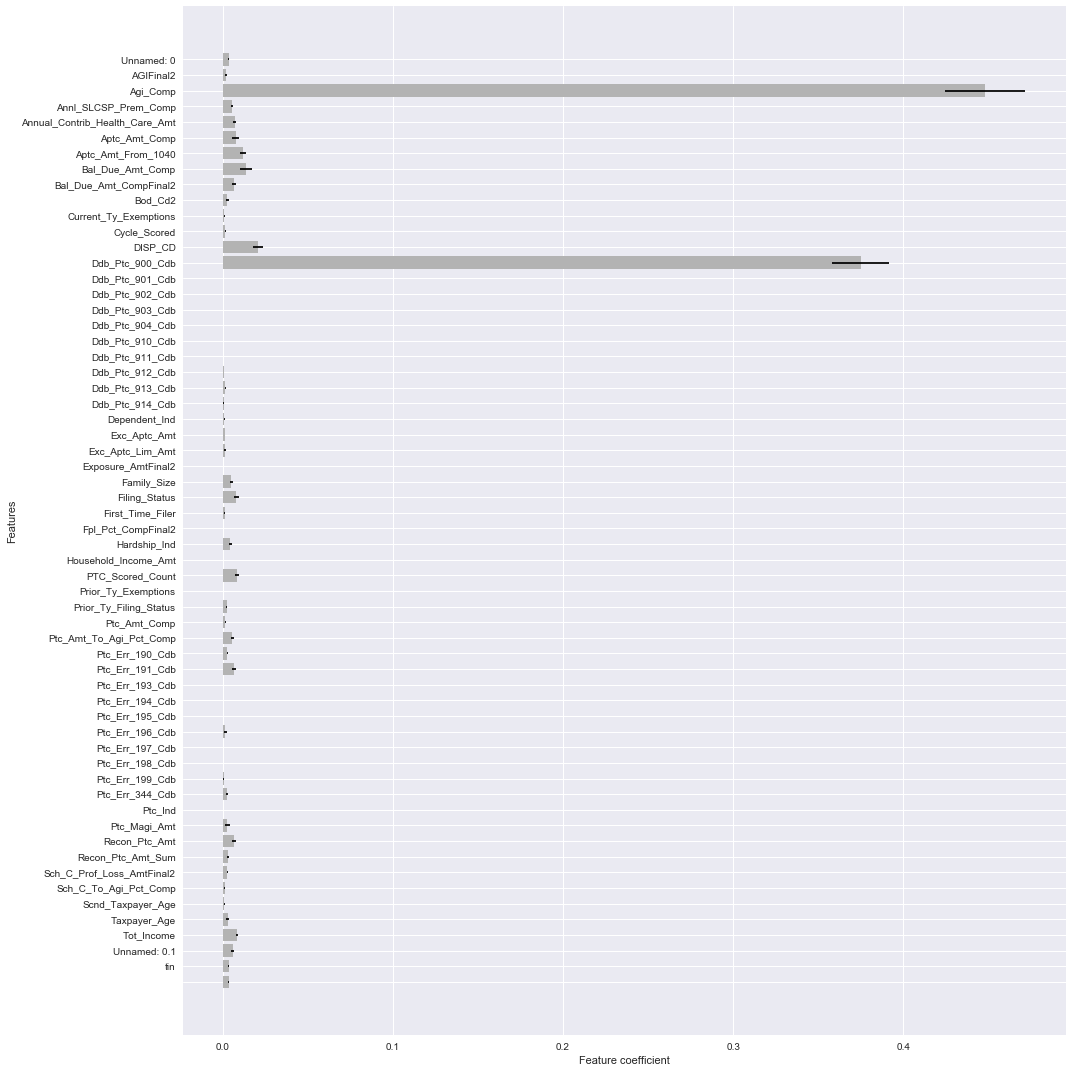

In [67]:
xerr=np.std(f_impo,axis=0)
plt.figure(figsize=(15,15))
plt.barh(range(len(f_impo[0])),np.mean(f_impo,axis=0),xerr=xerr, color='0.7')
plt.yticks(range(len(f_impo[0])),Xlabels,rotation=0)
plt.xlabel('Feature coefficient')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.tight_layout();

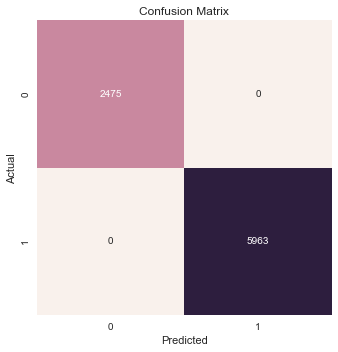

In [56]:
plt.figure(figsize=(5,5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_true, y_pred),index=[0,1],columns=[0,1]), 
            square=True, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout();

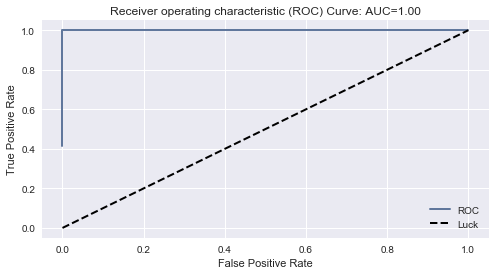

In [57]:
plot_roc(y_true,decfun)